In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base = pd.read_csv('tripdata.csv')

In [3]:
base.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month,is_holiday,seasons
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,0 days 00:07:32,Thursday,January,False,Inverno
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,0 days 00:07:13,Sunday,January,False,Inverno
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,0 days 00:08:00,Friday,January,False,Inverno
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,0 days 00:29:49,Sunday,January,False,Inverno
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,0 days 00:26:12,Tuesday,January,False,Inverno


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4207936 entries, 0 to 4207935
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_length         object 
 14  day_of_week         object 
 15  month               object 
 16  is_holiday          bool   
 17  seasons             object 
dtypes: bool(1), float64(4), object(13)
memory usage: 549.8+ MB


In [5]:
base['started_at'] = pd.to_datetime(base['started_at'])
base['ended_at'] = pd.to_datetime(base['ended_at'])
base['ride_length'] = base['ended_at'] - base['started_at']

In [6]:
base.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
ride_length           timedelta64[ns]
day_of_week                    object
month                          object
is_holiday                       bool
seasons                        object
dtype: object

In [7]:
ordem_meses = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

base['month'] = pd.Categorical(base['month'], categories=ordem_meses, ordered=True)

In [8]:
print("Contagem por tipo de usuário:")
print(base['member_casual'].value_counts())
print("\nDuração média por tipo de usuário:")
print(base.groupby('member_casual')['ride_length'].mean())
print("\nDuração mediana por tipo de usuário:")
print(base.groupby('member_casual')['ride_length'].median())

Contagem por tipo de usuário:
member_casual
member    2686491
casual    1521445
Name: count, dtype: int64

Duração média por tipo de usuário:
member_casual
casual   0 days 00:24:02.732997249
member   0 days 00:12:28.232390877
Name: ride_length, dtype: timedelta64[ns]

Duração mediana por tipo de usuário:
member_casual
casual   0 days 00:13:25
member   0 days 00:08:49
Name: ride_length, dtype: timedelta64[ns]


In [9]:
print("Corridas por dia da semana:")
print(base.groupby('day_of_week')['ride_id'].count())
print("\nDuração média por dia da semana:")
print(base.groupby('day_of_week')['ride_length'].mean())

Corridas por dia da semana:
day_of_week
Friday       650382
Monday       584224
Saturday     561677
Sunday       580888
Thursday     599229
Tuesday      634225
Wednesday    597311
Name: ride_id, dtype: int64

Duração média por dia da semana:
day_of_week
Friday      0 days 00:20:29.862382415
Monday      0 days 00:14:21.216382757
Saturday    0 days 00:20:27.981779563
Sunday      0 days 00:15:25.071113536
Thursday    0 days 00:16:12.966223263
Tuesday     0 days 00:14:52.798196223
Wednesday   0 days 00:14:40.242468328
Name: ride_length, dtype: timedelta64[ns]


In [10]:
print("Corridas por mês:")
print(base.groupby('month', observed=True)['ride_id'].count())
print("\nDuração média por mês:")
print(base.groupby('month', observed=True)['ride_length'].mean())

Corridas por mês:
month
January      113788
February     184721
March        230237
April        297741
May          442114
June         494338
July         540925
August       541312
September    536994
October      449113
November     245930
December     130723
Name: ride_id, dtype: int64

Duração média por mês:
month
January     0 days 00:12:10.568495799
February    0 days 00:13:24.860080878
March       0 days 00:14:18.193296472
April       0 days 00:16:13.581841264
May         0 days 00:18:26.189926127
June        0 days 00:19:03.955716534
July        0 days 00:19:05.417645699
August      0 days 00:18:04.074424731
September   0 days 00:16:15.181447092
October     0 days 00:15:37.792177024
November    0 days 00:12:53.691314601
December    0 days 00:11:26.990070607
Name: ride_length, dtype: timedelta64[ns]


In [11]:
print("Corridas em feriados vs não-feriados:")
print(base['is_holiday'].value_counts())
print("\nDuração média em feriados vs não-feriados (s):")
print(base.groupby('is_holiday')['ride_length'].mean())

Corridas em feriados vs não-feriados:
is_holiday
False    4008870
True      199066
Name: count, dtype: int64

Duração média em feriados vs não-feriados (s):
is_holiday
False   0 days 00:16:32.156697523
True    0 days 00:19:03.998819487
Name: ride_length, dtype: timedelta64[ns]


In [12]:
print("Top 10 estações de início:")
print(base['start_station_name'].value_counts().head(10))

Top 10 estações de início:
start_station_name
Streeter Dr & Grand Ave               62274
DuSable Lake Shore Dr & Monroe St     41489
DuSable Lake Shore Dr & North Blvd    36662
Michigan Ave & Oak St                 36309
Kingsbury St & Kinzie St              35840
Clark St & Elm St                     32024
Clinton St & Washington Blvd          31211
Millennium Park                       30541
Clinton St & Madison St               29861
Wells St & Concord Ln                 27991
Name: count, dtype: int64


In [13]:
base.groupby(['member_casual', 'day_of_week'], observed=True)['ride_id'].count().unstack()

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,317827,162821,266162,181652,222562,187352,183069
member,332555,421403,295515,399236,376667,446873,414242


In [14]:
base.groupby('month', observed=True)['ride_id'].count()

month
January      113788
February     184721
March        230237
April        297741
May          442114
June         494338
July         540925
August       541312
September    536994
October      449113
November     245930
December     130723
Name: ride_id, dtype: int64

In [15]:
base.groupby(['member_casual', 'start_station_name'])['ride_id'].count().sort_values(ascending=False).head(20)

member_casual  start_station_name                
casual         Streeter Dr & Grand Ave               48313
               DuSable Lake Shore Dr & Monroe St     32194
member         Kingsbury St & Kinzie St              26807
               Clinton St & Washington Blvd          25165
casual         Michigan Ave & Oak St                 23295
member         Clinton St & Madison St               22643
               Clark St & Elm St                     22403
casual         DuSable Lake Shore Dr & North Blvd    21359
               Millennium Park                       20839
               Shedd Aquarium                        20112
member         Clinton St & Jackson Blvd             18636
               Wells St & Concord Ln                 18129
               Wells St & Elm St                     17933
               Dearborn St & Erie St                 17558
               University Ave & 57th St              17499
casual         Dusable Harbor                        17263
member

In [16]:
base.groupby(['is_holiday', 'member_casual'], observed=True)['ride_id'].count().unstack()

member_casual,casual,member
is_holiday,,
False,1437890,2570980
True,83555,115511


In [17]:
palette_usuarios = {
    'casual': '#ed7223',
    'member': '#0b4672'
}
sns.set_style("whitegrid")
sns.set_context("notebook")

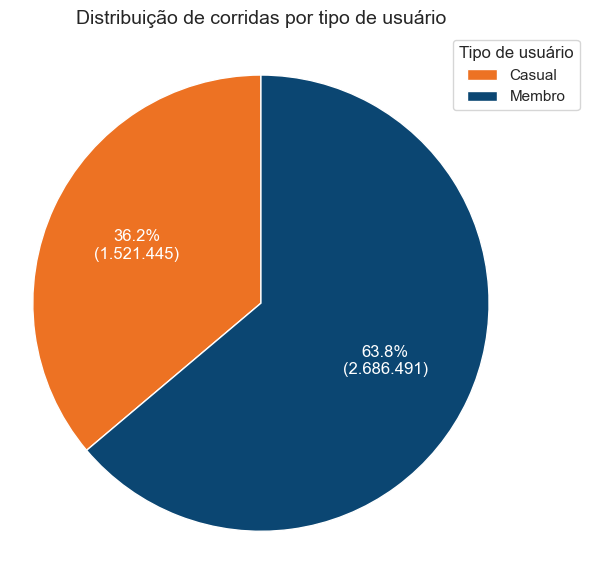

In [18]:
contagem_usuarios = base['member_casual'].value_counts().reindex(['casual', 'member'])
total_corridas = contagem_usuarios.sum()

cores = [palette_usuarios[tipo] for tipo in contagem_usuarios.index]

def formatar_label(pct, total):
    valor = int(round(pct / 100. * total))
    return f'{pct:.1f}%\n({valor:,})'.replace(',', '.')

plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    contagem_usuarios,
    colors=cores,
    startangle=90,
    autopct=lambda pct: formatar_label(pct, total_corridas),
    textprops={'color': 'white', 'fontsize': 12}
)

ax.axis('equal')

ax.legend(
    wedges,
    ['Casual', 'Membro'],
    title='Tipo de usuário',
    loc='upper right',
    bbox_to_anchor=(1.15, 1)
)

ax.set_title('Distribuição de corridas por tipo de usuário', fontsize=14)

plt.tight_layout()
plt.show()

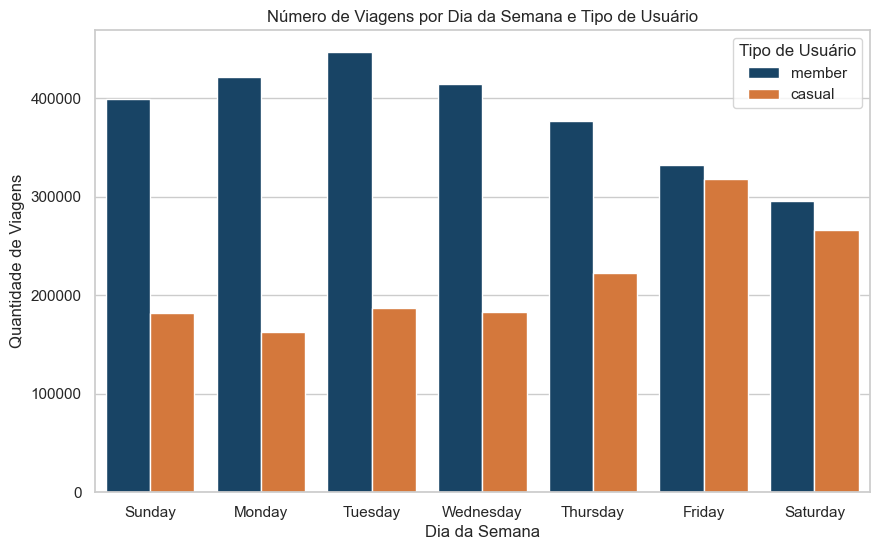

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=base, x='day_of_week', hue='member_casual', palette=palette_usuarios, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Número de Viagens por Dia da Semana e Tipo de Usuário')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Viagens')
plt.legend(title='Tipo de Usuário')
plt.show()

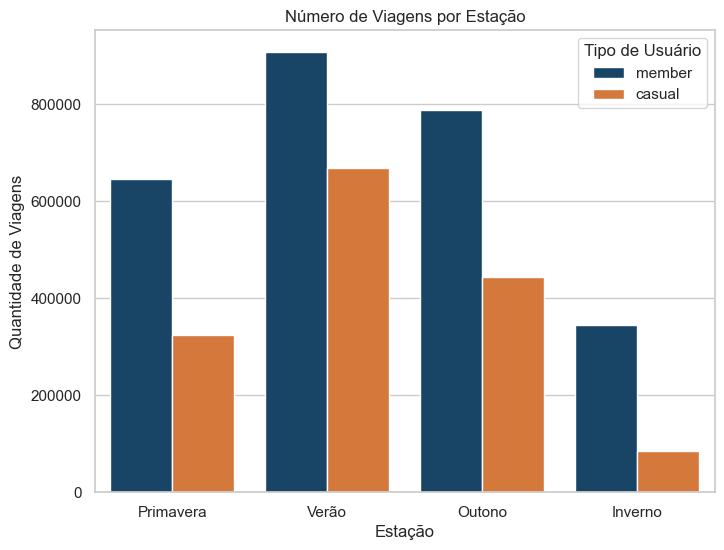

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=base, x='seasons', hue='member_casual', palette=palette_usuarios, order=['Primavera', 'Verão', 'Outono', 'Inverno'])
plt.title('Número de Viagens por Estação')
plt.xlabel('Estação')
plt.ylabel('Quantidade de Viagens')
plt.legend(title='Tipo de Usuário')
plt.show()

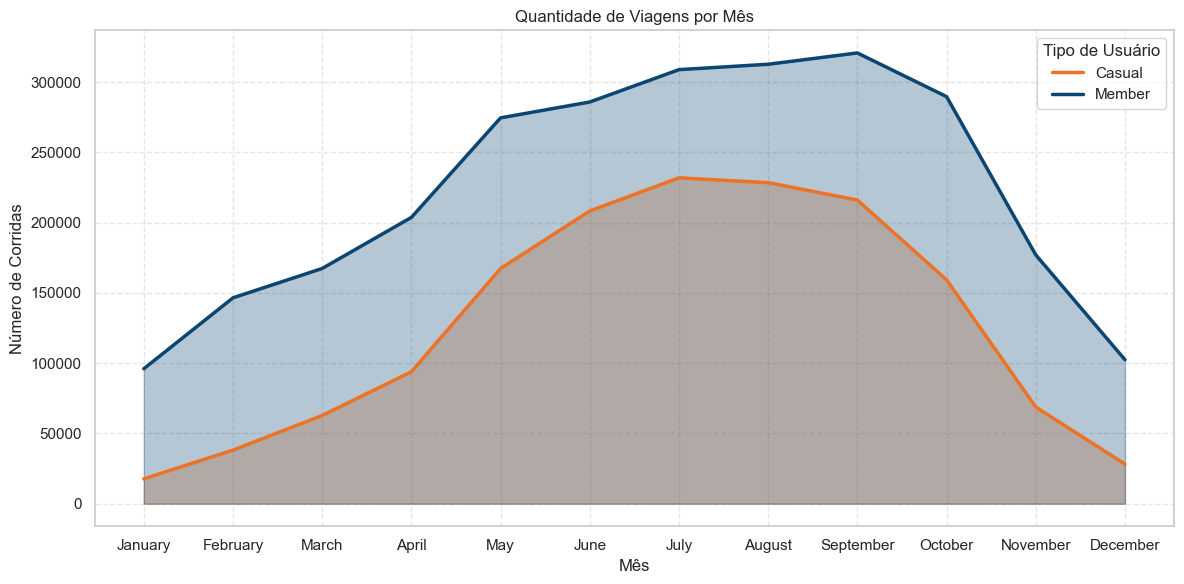

In [21]:
mensal = base.groupby(['month', 'member_casual'], observed=False).size().reset_index(name='qtd_corridas')
pivot = mensal.pivot(index='month', columns='member_casual', values='qtd_corridas').fillna(0)

plt.figure(figsize=(12, 6))

for tipo in ['casual', 'member']:
    plt.plot(pivot.index, pivot[tipo], label=tipo.capitalize(), color=palette_usuarios[tipo], linewidth=2.5)
    plt.fill_between(pivot.index, pivot[tipo], alpha=0.3, color=palette_usuarios[tipo])

plt.title('Quantidade de Viagens por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Corridas')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Tipo de Usuário')
plt.tight_layout()
plt.show()

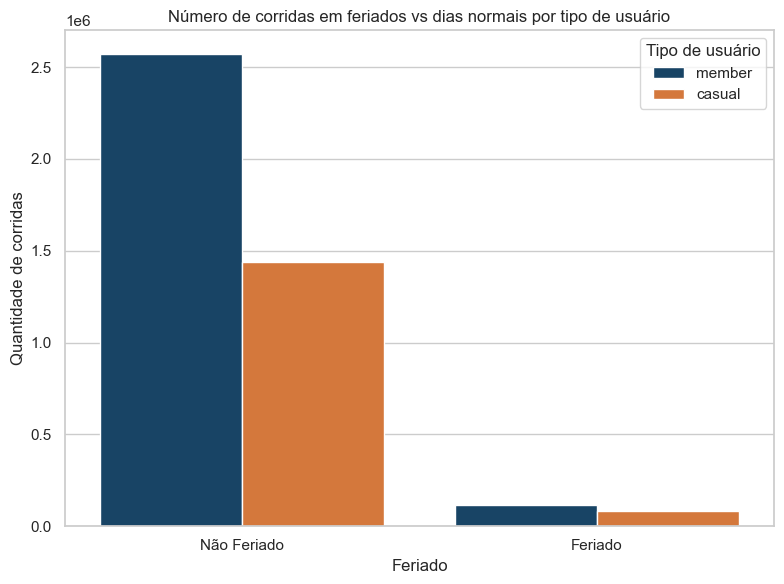

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data=base, x='is_holiday', hue='member_casual', palette=palette_usuarios)

plt.title('Número de corridas em feriados vs dias normais por tipo de usuário')
plt.xlabel('Feriado')
plt.ylabel('Quantidade de corridas')
plt.xticks([0,1], ['Não Feriado', 'Feriado'])
plt.legend(title='Tipo de usuário')
plt.tight_layout()
plt.show()

In [23]:
from scipy.stats import mannwhitneyu

agg = base.groupby(['member_casual', base['started_at'].dt.date, 'is_holiday'])['ride_id'].count().reset_index(name='qtd_corridas')

for user_type in ['casual', 'member']:
    dados = agg[agg['member_casual'] == user_type]
    
    feriado = dados[dados['is_holiday'] == True]['qtd_corridas']
    nao_feriado = dados[dados['is_holiday'] == False]['qtd_corridas']
    
    stat, p = mannwhitneyu(feriado, nao_feriado, alternative='two-sided')
    
    print(f"Teste para {user_type.capitalize()}:")
    print(f"Estatística U = {stat:.2f}, p-valor = {p:.4f}")
    if p < 0.05:
        print("Diferença significativa entre feriados e não feriados\n")
    else:
        print("Sem diferença significativa entre feriados e não feriados\n")

Teste para Casual:
Estatística U = 3375.50, p-valor = 0.8612
Sem diferença significativa entre feriados e não feriados

Teste para Member:
Estatística U = 2548.00, p-valor = 0.0958
Sem diferença significativa entre feriados e não feriados

